In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#### data
# Load the arrays from the npz file
data = np.load('./Interresult/heatmap_solar_summer.npz')

m_joint = data ['m_joint']
m_disjoint = data ['m_disjoint']
m_single = data ['m_single']
m_joint_noArb = data ['m_joint_noArb']
valueWind = data ['valueWind']
valueWind_noArb = data ['valueWind_noArb']
value_arbitrager = data ['value_arbitrager']
print(value_arbitrager.shape)

(9, 9)


In [4]:
storage_choice = np.arange(0.2, 2, 0.2)*1000
storage_choice=storage_choice.astype(int)
RES_choice = np.arange(0.2, 2, 0.2)*1000
RES_choice =RES_choice.astype(int)
value_df = pd.DataFrame({'Storage Capacity (MW)': np.repeat(storage_choice, len(RES_choice)),
                   'Solar Capacity (MW)': np.tile(RES_choice, len(storage_choice))})
valueWind = np.round(valueWind*1000, decimals=2)
valueWind_noArb = np.round(valueWind_noArb*1000, decimals=1)
value_arbitrager = np.round(value_arbitrager*1000, decimals=1)
# value_df['RES'] = valueWind.flatten()
# value_df['arbitrager'] = value_arbitrager.flatten()
gap_1 = (-valueWind+value_arbitrager)
gap_2 = (-valueWind_noArb+value_arbitrager)
value_df['Gap (Arbitrager - RES)'] = (gap_1).flatten()
value_df['Gap (Arbitrager) - RES(mono)'] = (gap_2).flatten()
value_df.head()

,Storage Capacity (MW),Solar Capacity (MW),Gap (Arbitrager - RES),Gap (Arbitrager) - RES(mono)
0,200,200,58.80,1124.7
1,200,400,116.68,1147.6
2,200,600,164.53,1167.4
3,200,800,193.54,1171.3
4,200,1000,205.17,1157.8


In [5]:
print(gap_2)

[[ 1124.7  1147.6  1167.4  1171.3  1157.8  1135.4  1116.1  1101.8  1092.1]
 [ 2373.7  2313.9  2359.   2397.4  2419.1  2425.6  2416.5  2370.5  2313.2]
 [ 3709.5  3506.   3559.4  3624.3  3678.9  3713.9  3699.6  3630.   3520.5]
 [ 5020.8  4773.6  4778.6  4860.6  4933.2  4954.7  4921.3  4832.7  4690.1]
 [ 6316.7  6009.3  6006.6  6079.1  6133.5  6135.7  6082.9  5975.1  5812. ]
 [ 7619.6  7230.2  7195.7  7254.   7285.8  7267.4  7194.1  7065.8  6882.7]
 [ 9232.8  8418.3  8352.6  8390.5  8398.2  8358.2  8264.4  8116.9  7924.5]
 [11173.5  9606.9  9501.3  9488.3  9472.2  9408.9  9297.7  9143.1  8945.6]
 [13367.6 10773.9 10611.5 10546.7 10507.6 10426.1 10308.4 10148.7  9946.3]]


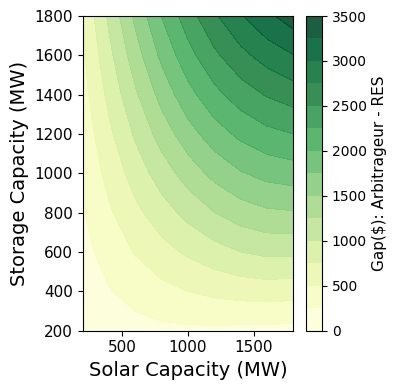

In [8]:
X, Y = np.meshgrid(RES_choice, storage_choice)
Z = (gap_1)
plt.subplots(figsize=(4, 4))
plt.contourf(X, Y, Z, 15, cmap='YlGn',alpha = 0.9)
cbar_2 = plt.colorbar()
cbar_2.set_label('Gap($): Arbitrageur - RES', fontsize = 11)
plt.ylabel('Storage Capacity (MW)', fontsize = 14)
plt.xlabel('Solar Capacity (MW)', fontsize = 14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.savefig("./pics/contour_GAP_solar_summer_1.pdf", bbox_inches='tight')

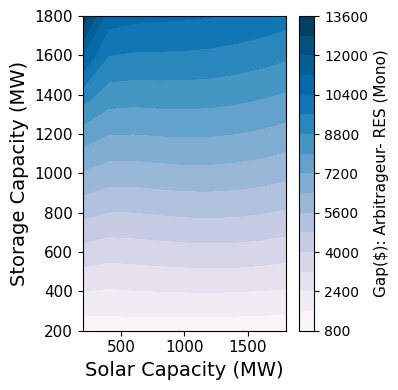

In [9]:
X, Y = np.meshgrid(RES_choice, storage_choice)
Z = (gap_2)
plt.subplots(figsize=(4, 4))
plt.contourf(X, Y, Z, 15, cmap='PuBu')
cbar = plt.colorbar()
cbar.set_label('Gap($): Arbitrageur- RES (Mono)', fontsize = 11)
plt.ylabel('Storage Capacity (MW)', fontsize = 14)
plt.xlabel('Solar Capacity (MW)', fontsize = 14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.savefig("./pics/contour_GAP_solar_summer_2.pdf", bbox_inches='tight')